# Comparing regression models

In addition to linear regression, many other regression models are available that are also suitable for modeling non-linear dependencies.

In this notebook two ensemble models are compared. The ensemble model is a combinations of several models.

- **RandomForestRegressor**: Random Forest, especially for avoiding overfitting
- **GradientBoostingRegressor**: an effective method that often gives more accurate predictions than other methods

In [1]:
### Importing the basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Importing more libraries

### train_test_split can split data into train data and test data

from sklearn.model_selection import train_test_split

### Models used

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Assessing the accuracy of the models

from sklearn.metrics import r2_score

## Function for model fitting and review

If the same code is used repeatedly, the you should make it a function.

In [3]:
### The coefficients of determination (R2) are collected in the following lists.

R2_train = []
R2_test = []

def modeling(model):
    
    # Fitting the model to train data
    model.fit(X_train, y_train)
            
    # The coefficient of determination (R2) for train data
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # The coefficient of determination (R2) for test data
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # Printing the coefficients of determination
    print("The coefficient of determination (R2) for train data :",round(R2_train_model,2))
    print("The coefficient of determination (R2) for test data :",round(R2_test_model,2))
       
    # Train data error terms as a chart
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Distribution of prediction errors in train data')
    sns.histplot((y_train - y_pred_train), kde = True, ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Realized and predicted as scatter chart for test data
    ax[1].set_title('Realized and predicted in test data')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('realized')
    ax[1].set_ylabel('forecast')

## Data review

In [4]:
### Opening the data in a dataframe

df = pd.read_csv('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/en/Advertising.csv')

### View the basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
### Getting acquainted with the data.

df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
### Delete the unnecessary column for the running number

df = df.drop('Unnamed: 0', axis = 1)

### View the result

df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [9]:
### Calculation of statistical numbers

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


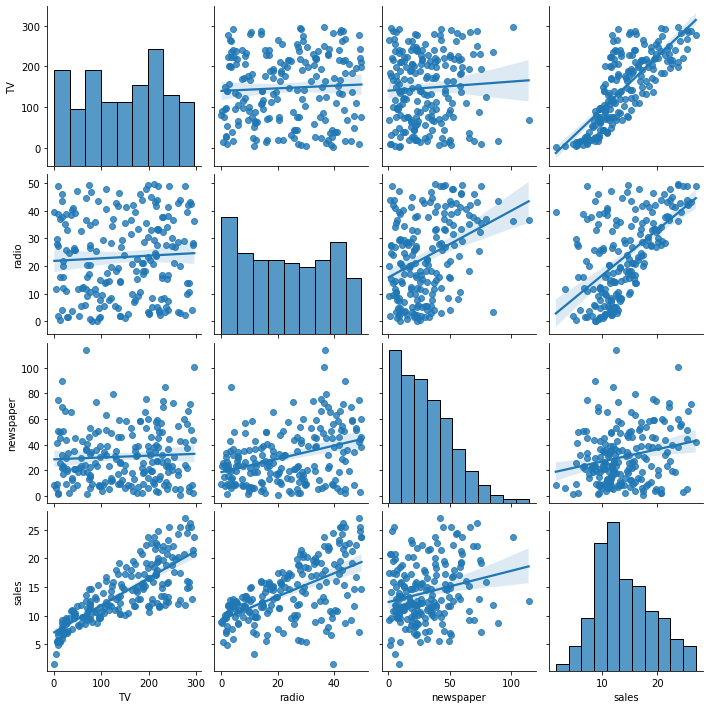

In [10]:
### A review of dependencies as scatter charts of the seaborn library

sns.pairplot(df, kind = 'reg')

<AxesSubplot:>

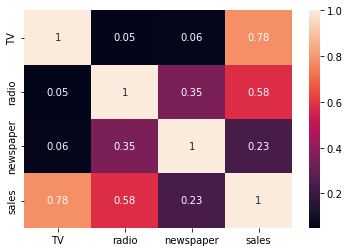

In [11]:
### Consider dependencies using correlation coefficients

correlation_matrix = df.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

## Fitting the models

In [12]:
### Independent variables

X = df[['TV', 'radio', 'newspaper']]

### Dependent, predicted variable

y = df['sales']

In [13]:
### Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

### Linear regression model

The coefficient of determination (R2) for train data : 0.89
The coefficient of determination (R2) for test data : 0.92


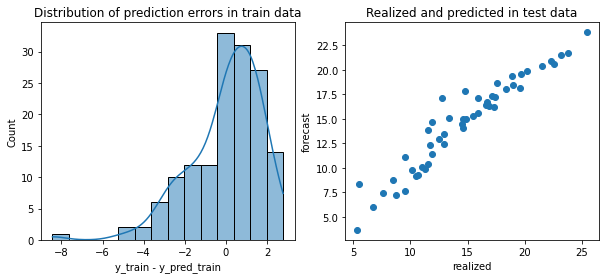

In [14]:
### Here the previously defined modeling function is utilized.

model = LinearRegression()
modeling(model)

### Random Forest

The coefficient of determination (R2) for train data : 1.0
The coefficient of determination (R2) for test data : 0.98


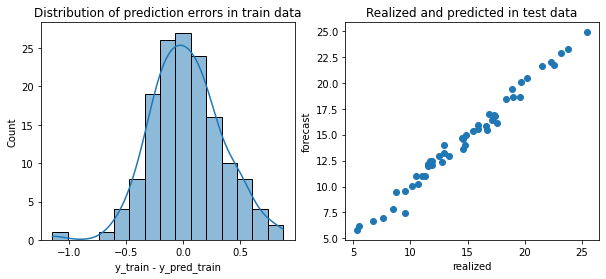

In [15]:
### Here the previously defined modeling function is utilized.

model = RandomForestRegressor()
modeling(model)

### Gradient Boosting

The coefficient of determination (R2) for train data : 1.0
The coefficient of determination (R2) for test data : 0.98


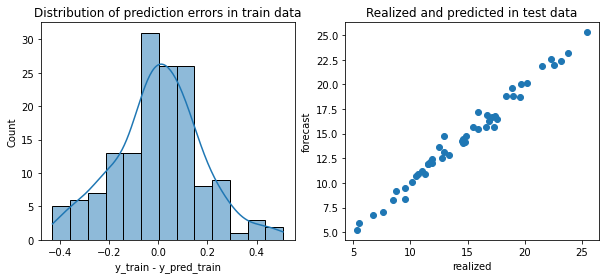

In [16]:
### Here the previously defined modeling function is utilized.

model = GradientBoostingRegressor()
modeling(model)

Finally, a summary of the accuracy of the models tested above:

In [17]:
method = ["LinearRegression", "RandomForestRegressor", "GradientBoostingRegressor"]
pd.DataFrame({'Model': method, 'The coefficient of determination (train data)':R2_train, 'The coefficient of determination (test data)':R2_test})

,Model,The coefficient of determination (train data),The coefficient of determination (test data)
0,LinearRegression,0.89,0.92
1,RandomForestRegressor,1.00,0.98
2,GradientBoostingRegressor,1.00,0.98


Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>.